In [1]:
import pandas as pd
import numpy as np
import json
import sys
from importlib import reload
sys.path.append('../scripts/')
import utils

In [2]:
reload(utils)

<module 'utils' from '../scripts/utils.py'>

In [3]:
ls ../data/fault_data/

fault_df_inv.csv              galetzka_mainshock_ramp.shp
galetzka_mainshock.cpg        galetzka_mainshock_ramp.shx
galetzka_mainshock.dbf        gurla_pts_df.csv
galetzka_mainshock.prj        gurla_tri_stresses.geojson
galetzka_mainshock.qpj        gurla_tris.geojson
galetzka_mainshock.shp        mht_rup_stresses.csv
galetzka_mainshock.shx        tib_dog_pts_df.csv
galetzka_mainshock_ramp.cpg   tib_dog_tri_stresses.geojson
galetzka_mainshock_ramp.dbf   tib_dog_tris.geojson
galetzka_mainshock_ramp.prj   wnfs_tris.csv
galetzka_mainshock_ramp.qpj


In [4]:
with open('../data/fault_data/tib_dog_tris.geojson') as f:
    td = json.load(f)

In [5]:
td['features'][0]

{'geometry': {'coordinates': [[[124496.1, 3172901.7, 4000.0],
    [125070.3, 3172690.8, 3743.0],
    [124256.8, 3172817.9, 4156.0],
    [124496.1, 3172901.7, 4000.0]]],
  'type': 'Polygon'},
 'properties': {'POINTA': 195.0,
  'POINTB': 11.0,
  'POINTC': 12.0,
  'area_sq_km': 0.058032022780406034,
  'center': [124607.73333333334, 3172803.466666667, 3966.3333333333335],
  'dip': 31.852099159915703,
  'rake': -131.86853092923565,
  'rake_err': 10,
  'strike': 332.71822991430054},
 'type': 'Feature'}

In [6]:
tdz = pd.read_csv('../data/gis/tib_dog_elev_pts.csv', index_col=2)
tdz.columns = ['x', 'y', 'z']

tdz.head()

,x,y,z
id,,,
0,100713.406808,3207692.245450,2162
1,100001.512969,3208997.384156,2084
2,99357.418542,3210099.124623,2069
3,98526.875729,3211404.263330,2041
4,97204.787169,3212336.505263,2129


In [47]:
#utils.add_tri_z_values(td['features'], tdz, 'z')

In [7]:
td['features'][0]

{'geometry': {'coordinates': [[[124496.1, 3172901.7, 4000.0],
    [125070.3, 3172690.8, 3743.0],
    [124256.8, 3172817.9, 4156.0],
    [124496.1, 3172901.7, 4000.0]]],
  'type': 'Polygon'},
 'properties': {'POINTA': 195.0,
  'POINTB': 11.0,
  'POINTC': 12.0,
  'area_sq_km': 0.058032022780406034,
  'center': [124607.73333333334, 3172803.466666667, 3966.3333333333335],
  'dip': 31.852099159915703,
  'rake': -131.86853092923565,
  'rake_err': 10,
  'strike': 332.71822991430054},
 'type': 'Feature'}

In [8]:
utils.add_tri_centers_area(td['features'])

In [9]:
utils.add_strike_dip(td['features'])
utils.add_rake_from_trend(td['features'], 100, 10)

In [10]:
tib_dog_pts_df = utils.tri_dict_to_df(td, fault_name='tib_dog')

In [11]:
tib_dog_pts_df.head()

x        y         z fault_name
tri vertex                                        
0   a       124496.1  3172902      4000    tib_dog
    b       125070.3  3172691      3743    tib_dog
    c       124256.8  3172818      4156    tib_dog
    m       124607.7  3172803  3966.333    tib_dog
1   a       124058.1  3173298      4000    tib_dog

In [12]:
tib_dog_pts_df.to_csv('../data/fault_data/tib_dog_pts_df.csv')

In [13]:
with open('../data/fault_data/tib_dog_tris.geojson', 'w') as f:
    json.dump(td, f)

In [14]:
strikes = [feat['properties']['strike'] for feat in td['features']]
dips = [feat['properties']['dip'] for feat in td['features']]
rakes = [feat['properties']['rake'] for feat in td['features']]
cx = [feat['properties']['center'][0] for feat in td['features']]
cy = [feat['properties']['center'][1] for feat in td['features']]
cz = [feat['properties']['center'][2] for feat in td['features']]

In [15]:
td['features'][120]

{'geometry': {'coordinates': [[[107466.0, 3187793.9, 4000.0],
    [111001.4, 3188565.6, 2000.0],
    [107917.1, 3186682.9, 4004.0],
    [107466.0, 3187793.9, 4000.0]]],
  'type': 'Polygon'},
 'properties': {'POINTA': 202.0,
  'POINTB': 184.0,
  'POINTC': 27.0,
  'area_sq_km': 2.4518844061906653,
  'center': [108794.83333333333, 3187680.8000000003, 3334.6666666666665],
  'dip': 29.311525533043664,
  'rake': -118.99541215745927,
  'rake_err': 10,
  'strike': 337.56090898408797},
 'type': 'Feature'}

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

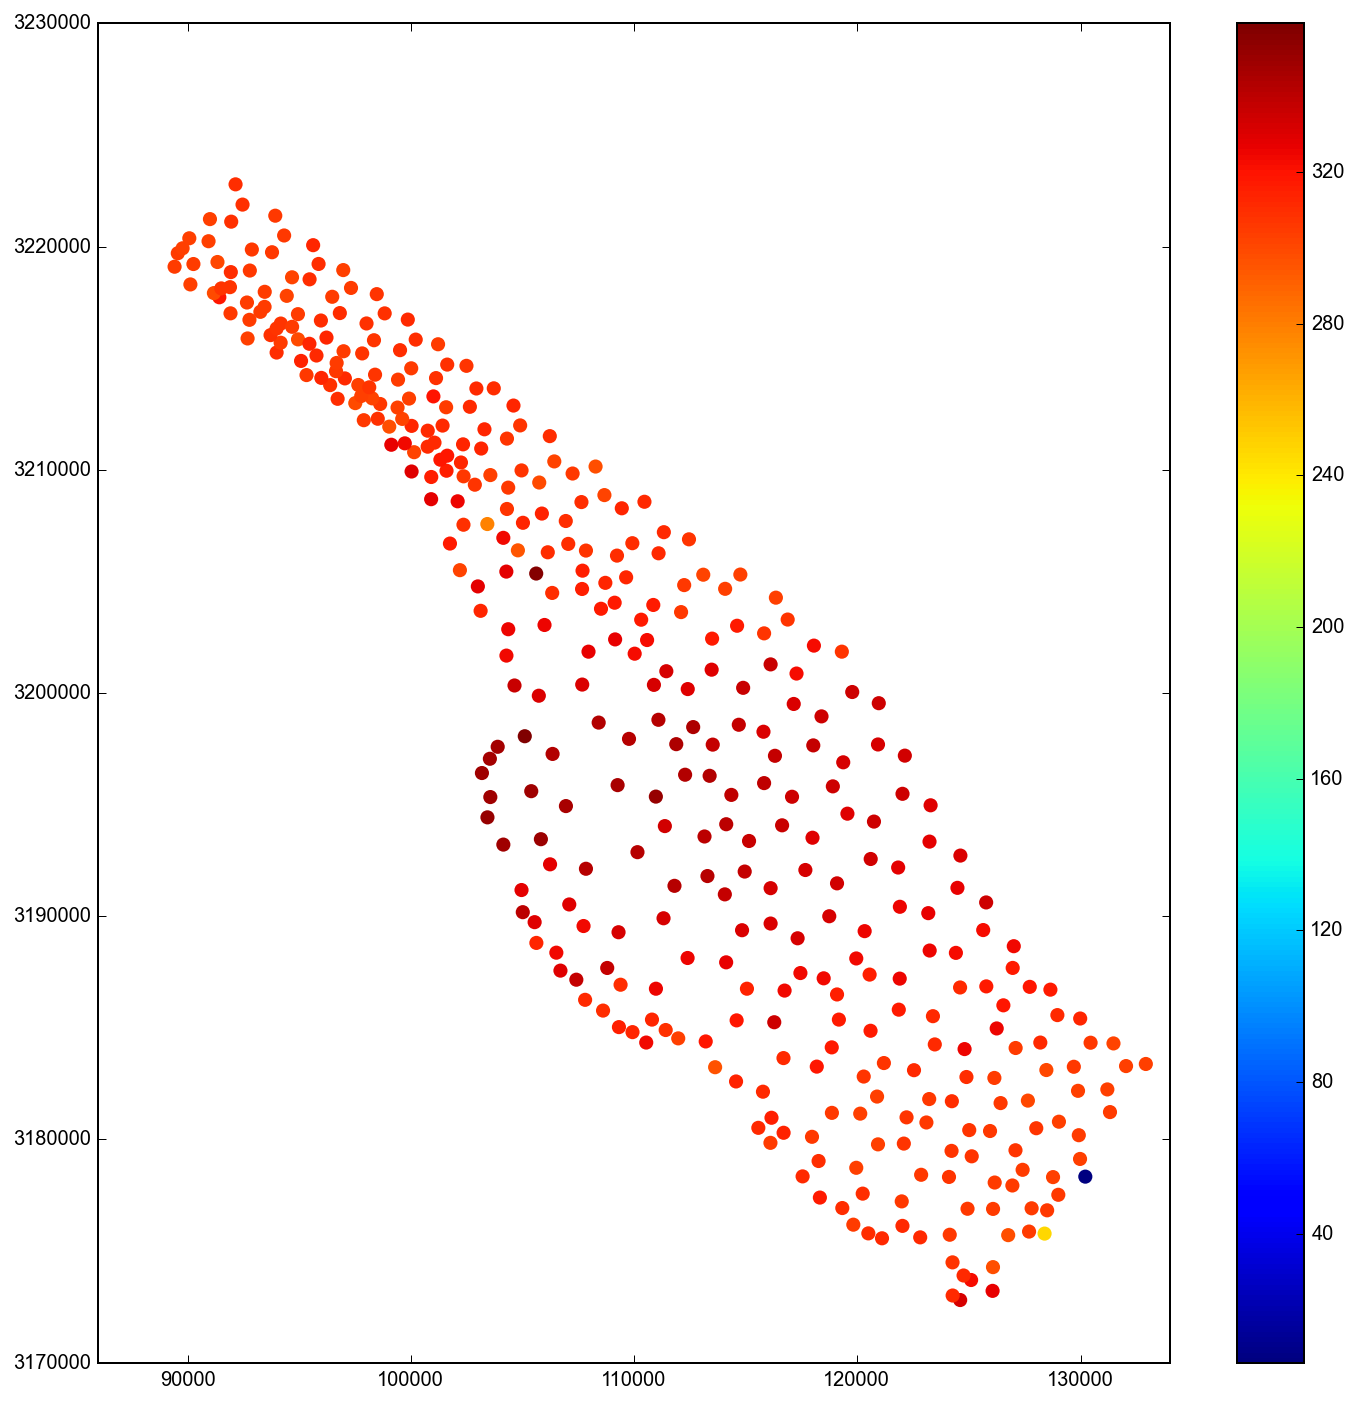

In [17]:
plt.figure(figsize=(12, 12))

plt.scatter(cx, cy, c=strikes,
           s=50, lw=0)
plt.colorbar()
plt.axis('equal')

plt.show()

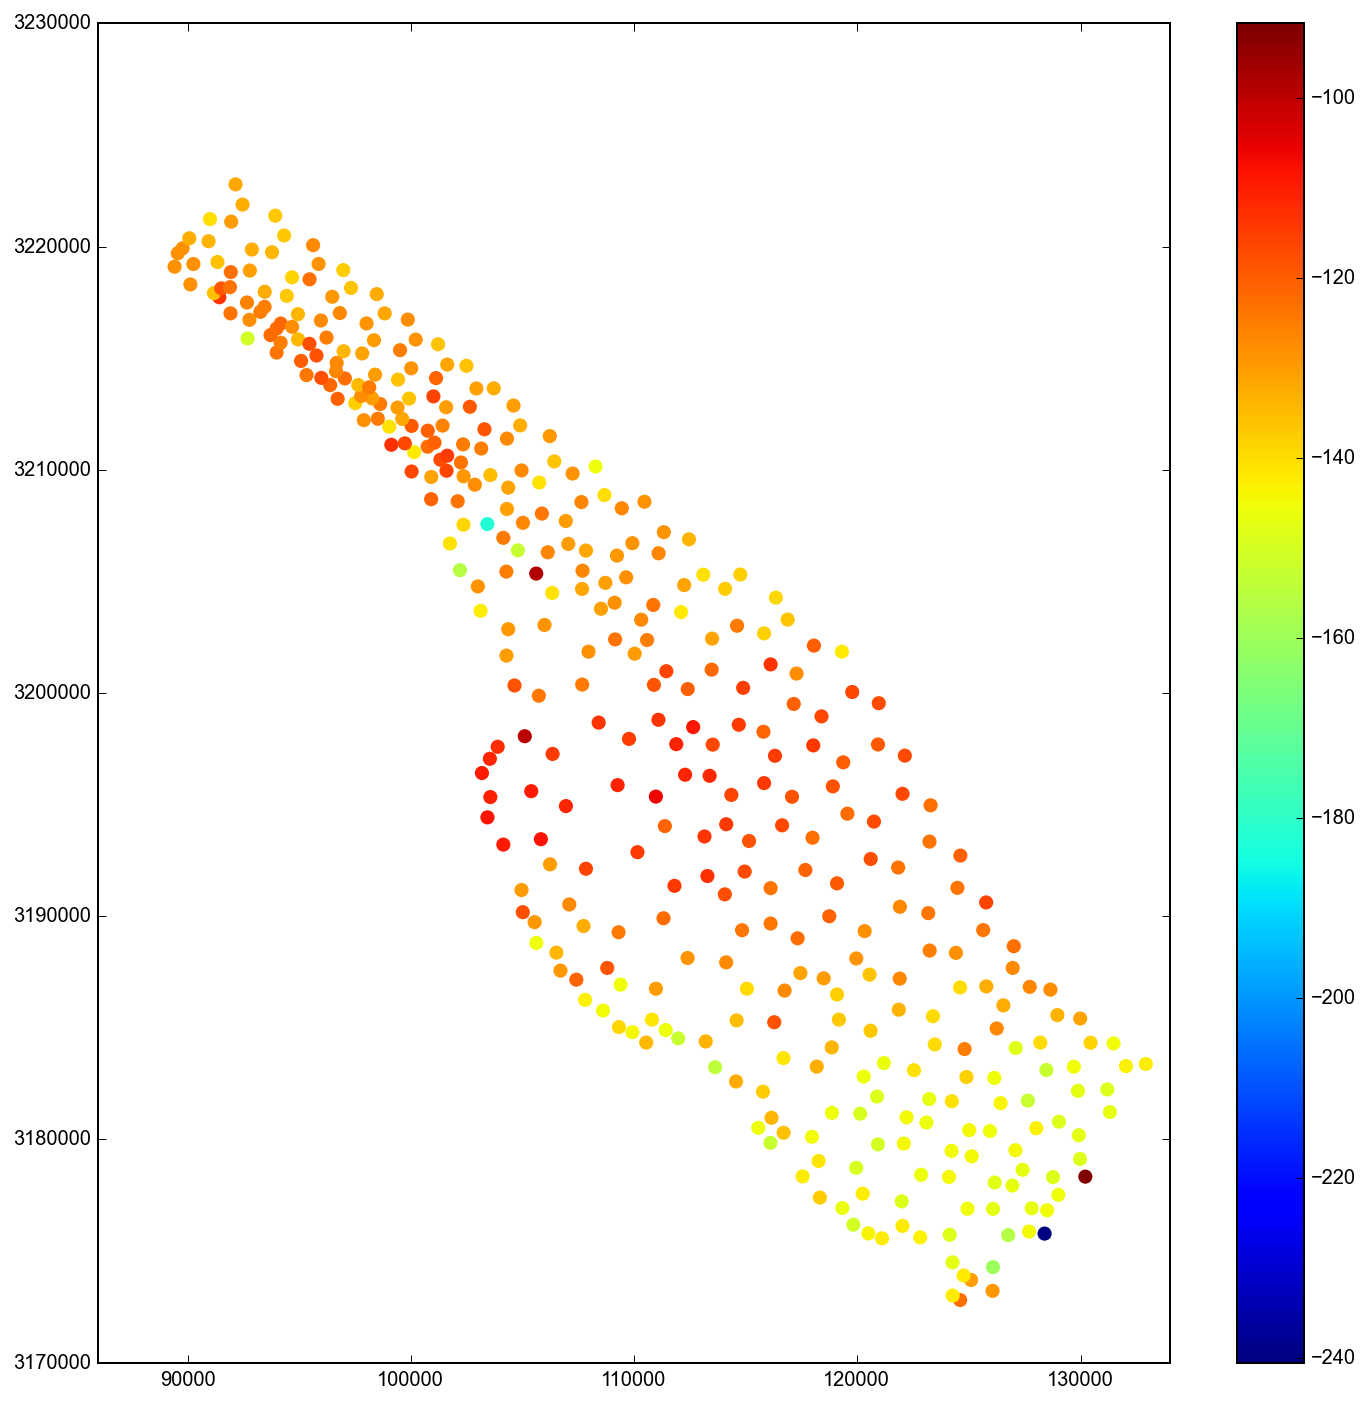

In [18]:
plt.figure(figsize=(12, 12))

plt.scatter(cx, cy, c=rakes,
           s=50, lw=0)
plt.colorbar()
plt.axis('equal')

plt.show()

## Much later... update rake for Tibrikot/ Dogari

In [9]:
with open('../data/fault_data/tib_dog_tri_stresses.geojson') as f:
    td = json.load(f)

In [11]:
utils.add_rake_from_trend(td['features'], 90., 15)

In [13]:
with open('../data/fault_data/tib_dog_tri_stresses.geojson', 'w') as f:
    json.dump(td, f)